<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U37T2C71DecisionTreeSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
ARBOL DE DECISION
  ACERCA DE ESTE SPRINT
    Objetivo del Sprint
      Comprender los árboles de decisión a través de su implementación desde cero.
      Familiarizarse con la implementación de algoritmos complejos.
    Cómo aprenderemos
      Después de implementar un árbol de decisión desde cero, realizaremos el entrenamiento y la validación del modelo.

  QUE ES EL APRENDIZAJE CON ARBOLES DE DECISION?
    El aprendizaje con árboles de decisión es un método de aprendizaje automático que construye un grafo con estructura de árbol, llamado árbol de decisión.
    En el campo del aprendizaje automático, este método suele denominarse simplemente “árbol de decisión”.
    Puede utilizarse tanto para clasificación como para regresión, y en el caso de clasificación es posible realizar clasificación multiclase (más de 3 clases).
    Aquí trataremos únicamente el caso básico de clasificación.

    Árbol de decisión
      Un árbol de decisión es un grafo con estructura de árbol que asigna datos —expresados mediante combinaciones de atributos y valores {atributo1: valor1, atributo2: valor2, atributo3: valor3, …, atributo n: valor n}— a una determinada clase, mediante una serie de ramificaciones condicionales.

      El siguiente ejemplo muestra un grafo en el que, en función del valor del atributo “temperatura en el lugar del evento”, se asigna la clase “se celebra” o “se cancela”.
      Basta con una única ramificación condicional —“¿la temperatura en el lugar del evento es mayor o igual a 35 grados?”— para realizar la clasificación con un árbol de decisión.
      Por ejemplo, si se introduce el valor 36 grados en este árbol de decisión, el resultado (la decisión) será “se cancela”.

      Cabe señalar que en el ámbito del aprendizaje automático, “atributo y valor” se refiere a “nombre de la característica y valor de la característica”.
      En adelante, nos referiremos a ambos simplemente como características.

    Cómo construir un árbol de decisión
      Existen diferentes maneras de aprender un árbol de decisión, pero aquí veremos uno de esos métodos implementándolo desde cero (scratch).
      El árbol de decisión que se construya variará dependiendo del método de aprendizaje, los hiperparámetros y los datos de entrenamiento.

    Características que puede manejar
      En teoría, los árboles de decisión pueden manejar no solo variables cuantitativas, sino también variables categóricas.
      Sin embargo, la implementación de scikit-learn solo admite variables cuantitativas, por lo que en nuestra implementación desde cero también lo haremos así.

      En el ejemplo anterior, “tipo de recinto” con valores “interior” y “exterior” sería una variable categórica, pero al convertirlo en “¿es interior?” con valores “0 y 1”, se puede manejar como variable cuantitativa.

  ARBOL DE DECISION DESDE CERO
    Vamos a crear, desde cero, una clase de árbol de decisión para clasificación.
    La implementación se hará con el uso mínimo de librerías, como NumPy, para programar directamente el algoritmo.
    En el aprendizaje del árbol de decisión aparece un hiperparámetro llamado profundidad (máxima), que indica cuántas veces se repite la ramificación condicional.
    La implementación con profundidad 1 será la tarea obligatoria.
    La implementación con profundidad mayor o igual a 2 será una tarea avanzada.
    Existen diferentes métodos de aprendizaje, pero aquí utilizaremos una implementación basada en el método CART, que también usa scikit-learn.
    Este método simplifica la complejidad del aprendizaje limitando las ramas a dos divisiones únicamente.
    A continuación, se proporciona un esqueleto de código.
    Por favor, agrega el código en la clase ScratchDecisionTreeClassifierDepth1.
    Encontrando la condicion de divicion a travez del aprendizaje
      A través del aprendizaje, se determina bajo qué condiciones dividir un nodo para que la separación sea efectiva.
      Para juzgar si la separación se ha realizado de manera adecuada, se calculan dos valores para cada nodo: la impureza de Gini y la ganancia de información.
'''

accuracy:  0.8070175438596491
precision:  0.7582417582417582
recall:  1.0
f1_score:  0.8625


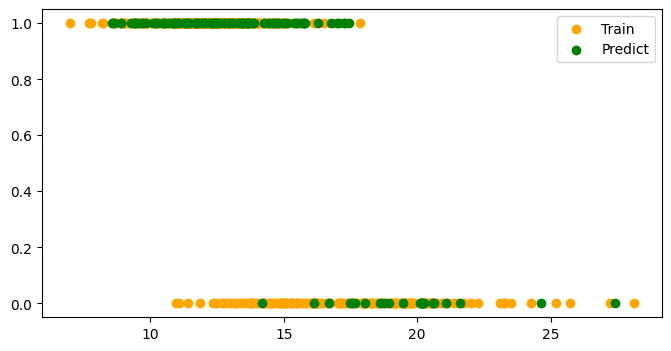

In [2]:
# PLANTILLA O PROTOTIPO
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from collections import Counter

def evaluate(y_pred, y_test):
    print("accuracy: ",format(accuracy_score(y_test, y_pred)))
    print("precision: ",format(precision_score(y_test, y_pred)))
    print("recall: ",format(recall_score(y_test, y_pred)))
    print("f1_score: ",format(f1_score(y_test, y_pred)))

# PROBLEMA 1 - FUNCION PARA CALCULAR LA IMPUREZA (GINI)
# gini como una funcion global
def gini(y):
    unique, count = np.unique(y, return_counts=True)
    tmp = 0
    for i in unique:
      tmp += (count[unique == i] / np.sum(count)) ** 2
    return 1 - tmp

class ScratchDecesionTreeClassifierDepth1():
    """
    Scratch Implementation of a Depth-1 Decision Tree Classifier
      Parameters
    """
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        # a root so that we can know where we started
        self.root = None

    # PROBLEMA 2 - FUNCION PARA CALCULAR LA GANANCIA DE INFORMACION
    def _information_gain(self, y, X_column, split_thresh):
        # calculate the parent entropy
        parent_gini = gini(y)

        #generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted average child entropy
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_g, e_g = gini(y[left_idxs]), gini(y[right_idxs])
        child_gini = (n_l / n) * e_g + (n_r / n) * e_g

        # calculate the information gain
        ig = parent_gini - child_gini
        return ig

    # PROBLEMA 3 - APRENDIZAJE
    def fit(self, X, y):
        """
          決定木分類器を学習する
          Parameters
          ----------
          X : 次の形のndarray, shape (n_samples, n_features)
              訓練データの特徴量
          y : 次の形のndarray, shape (n_samples, )
              訓練データの正解値
        """
        # grow tree
        # apply a safety check
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    # function to grow thetree
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        # apply the stopping criteria of our growing tree
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            # if the condition is true that would mean that we are at the leaf node
            # check for the common label in our node
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # if we did no meet the stopping criteria
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        # do a greedy search
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        # continue growing
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)

        node = Node(best_feat, best_thresh, left, right)
        return node

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            # lets go over all threshold
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # PROBLEMA 4 - ESTIMACION
    def predict(self, X):
        # traverse our tree
        return np.array([self._traverse_tree(x, self.root) for x in X])

    # a function helper for prediction
    def _traverse_tree(self, x, node):
        # check for the stopping criteria
        if node.is_leaf_node():
            return node.value

        # check if we go from left or right
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    # function to check the common label in our node
    def _most_common_label(self, y):
        # calculating the number of occurencies in y using counter
        counter = Counter(y)
        # getting value of the most common label
        most_common = counter.most_common(1)[0][0]
        return most_common

# a helper calss to store information of the node
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    # a helper function to determine if we are at the leafnode
    def is_leaf_node(self):
        return self.value is not None

def decision_region(X, y, model, step= 0.01, title= 'Decision Region',
                    xlabel= 'xlabel', yalbel= 'ylabel', target_names= ['1', '-1']):
    import matplotlib.patches as mpatches
    from matplotlib.colors import ListedColormap
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # Pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])- 0.5, np.max(X[:,0])+ 0.5, step),
                                   np.arange(np.min(X[:,1])- 0.5, np.max(X[:,1])+ 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(yalbel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color= scatter_color[i], label= target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    #plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# PROBLEMA 3 - APRENDIZAJE
# load the data
data =datasets.load_breast_cancer()
X = data.data
y = data.target
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# trainning our classifier
clf = ScratchDecesionTreeClassifierDepth1(max_depth=10)
clf.fit(X_train, y_train)

# predicting
y_pred = clf.predict(X_test)

# PROBLEMA 5 - APRENDIZAJE Y ESTIMACION
# verify the metrics
evaluate(y_pred, y_test)

# graph visualization
fig, ax = plt.subplots(figsize=(8,4))
plt.rcParams["font.size"] = 10
plt.scatter(X_train[:,0], y_train, label="Train", c="orange")
plt.scatter(X_test[:,0], y_pred, label="Predict", c="green")
plt.legend()
plt.plot();


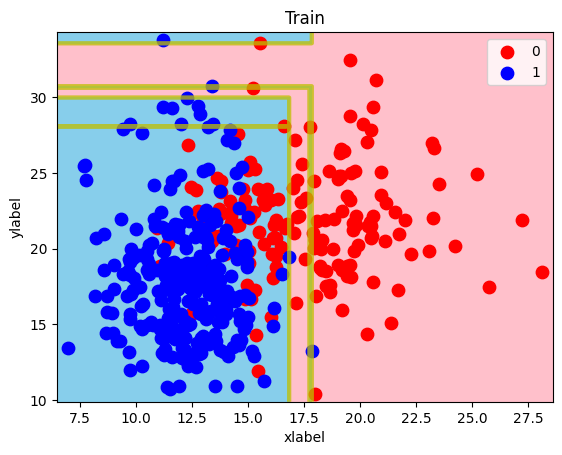

In [4]:
# PROBLEMA 6 - VISUALIZACION DEL AREA DE DECISION
clf_2 = ScratchDecesionTreeClassifierDepth1(max_depth=10)
clf_2.fit(X_train[:,:2], y_train)
y_pred_2 = clf_2.predict(X_test)
decision_region(X_train[:,:2], y_train, clf_2, title='Train', target_names=['0', '1'])

In [3]:
# PROBLEMA 7 - CREANDO UNA CLASE DE ARBOL DE DECISION CON 2 PROFUNDIDADES (NIVELES)
class DecisionTreeNode():
    '''
      Data structure to represent a node in a decision tree.
    '''
    def __init__(self, verbose=False, max_depth=None):
        self.verbose = verbose
        self.max_depth = max_depth

    def _tree_contruct(self, X, y, depth=None):
        '''
          Determine the split and generate 2 node left and right
          Parameters
          --------------------------------------------------------
          X: the following forms os ndarray, shape(n_samples, n_features)
              Features of training data
          y: the following form of ndarray, shape(n_samples,)
              correct answer value of training data
        '''
        if len(np.unique(y)) == 1 or depth == self.max_depth:
          self.label = statistics.mode(y)
          return

        number_of_features = X.shape[1]
        self.best_gain = 0
        for i in range(number_of_features):
          candidate_thresholds = np.unique(X[:, i])

          for threshold in candidate_thresholds:
            left = y[X[:, i] < threshold]
            right = y[X[:, i] >= threshold]

            split_info_gain = self._information_gain(y, left, right)

            if split_info_gain > self.best_gain:
                self.threshold = threshold
                self.feature_chosen = i
                self.best_gain = split_info_gain

                if self.verbose:
                  print("depth: {}, feature: {}, information_gain{}".format(depth, self.feature_chosen, self.best_gain))

        self.label = None
        self.left_node = DecisionTreeNode(verbose=self.verbose, max_depth=self.max_depth)
        self.left_node._tree_contruct(X=X[X[:, self.feature_chosen] < self.threshold],
                                      y=y[X[:, self.feature_chosen] < self.threshold],
                                      depth = depth +1)
        self.right_node = DecisionTreeNode(verbose=self.verbose, max_depth=self.max_depth)
        self.right_node._tree_contruct(X=X[X[:, self.feature_chosen] >= self.threshold],
                                       y=y[X[:, self.feature_chosen] >= self.threshold],
                                       depth = depth +1)

    def predict(self, X):
        '''
          Estimate the label of a sample by traverse node in a decision tree classifier
        '''
        if self.label is None:
          if X[self.feature_chosen] < self.threshold:
            return self.left_node.predict(X)

          else:
            return self.right_node.predict(X)

        else:
          return self.label

    def _gini(self, node):
        '''
          Function to calculate gini impurity of a node
            parameters
            -------------
            node: nd_array shape(n_samples, 1)
            output
            ------------------
            gini impurity of a node
        '''
        samples, counts = np.unique(node, return_counts=True)
        result = 1
        node_count = len(node)
        for count in counts:
          result -= (count / node_count) ** 2

        return result

    def _information_gain(self, parent, left, right):
        '''
          Calculate information gain of a specific division using gini impurity
            parameters
            -----------------------
            parent, left, right: parent, left, right node of the split, ndarray shape(number_of_samples, 1)

            output
            -----------------------
            information gain of the division
        '''
        parent_gini = self._gini(parent)
        left_gini = (self._gini(left) * len(left)) / len(parent)
        right_gini = (self._gini(right) * len(right)) / len(parent)

        return parent_gini - left_gini - right_gini

class ScratchDecisionTreeClassifierDepth2():
    '''
      Decision tree classifier scratch implememntation
        parameters
        --------------------------
        verbose: bool
          true to output the learning process
    '''
    def __init__(self, verbose=False, max_depth=None):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        '''
          Learn the decision tree classifier
            parameters
            ------------------------------
            X: the following forms of ndarray, shape(n_samples, n_features)
              Features of training data
            y: the following form of ndarray, shape(n_samples,)
              correct answer value of training data
        '''
        self.root = DecisionTreeNode(verbose=self.verbose, max_depth=self.max_depth)
        self.root._tree_contruct(X, y, 0)

    def predict(self, X):
        '''
          Estimate the label using a decision tree classifier
        '''
        result = np.zeros(len(X))
        for i, sample in enumerate(X):
          result[i] = self.root.predict(sample)

        return result

model_3 = ScratchDecisionTreeClassifierDepth2(verbose=False, max_depth=2)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
evaluate(y_pred_3, y_test)

accuracy:  0.9210526315789473
precision:  0.9166666666666666
recall:  0.9565217391304348
f1_score:  0.9361702127659575


In [5]:
# PROBLEMA 8 - CREAR UNA CLASE DE CLASIFICACION POR ARBOL DE DECISION CON PROFUNDIDAD ILIMITADA (GINI = 0)
model_4 = ScratchDecisionTreeClassifierDepth2(verbose=True, max_depth=None)
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
evaluate(y_pred_4, y_test)
print(y_pred_4)


depth: 0, feature: 0, information_gain0.000593450215370106
depth: 0, feature: 0, information_gain0.0011895205199914383
depth: 0, feature: 0, information_gain0.0017882283038366253
depth: 0, feature: 0, information_gain0.002389591111113476
depth: 0, feature: 0, information_gain0.002993626641978331
depth: 0, feature: 0, information_gain0.0036003527542722846
depth: 0, feature: 0, information_gain0.0042097874652820555
depth: 0, feature: 0, information_gain0.004821948953522059
depth: 0, feature: 0, information_gain0.005436855560543574
depth: 0, feature: 0, information_gain0.006054525792764998
depth: 0, feature: 0, information_gain0.006674978323329972
depth: 0, feature: 0, information_gain0.007298231993987603
depth: 0, feature: 0, information_gain0.00792430581700132
depth: 0, feature: 0, information_gain0.008553218977080723
depth: 0, feature: 0, information_gain0.009184990833342455
depth: 0, feature: 0, information_gain0.009819640921295558
depth: 0, feature: 0, information_gain0.0104571889548